## **Ejemplos de simulación de campos ópticos correspondientes a iluminación parcialmente coherente**

In [ ]:
# LIBRERIAS
import matplotlib
import numpy as np
import matplotlib.pylab as plt
from PIL import Image as im
from numpy import random


%matplotlib inline 
plt.rcParams['figure.figsize'] = 26, 12 # para modificar el tamaño de la figura
#matplotlib.rc('xtick', labelsize=20) 
#matplotlib.rc('ytick', labelsize=20) 
font = {'weight' : 'bold',
        'size'   : 24}

matplotlib.rc('font', **font)

# Funciones a utilizar

In [ ]:
def rect2D(x): # FUNCION RECTANGULO EN 2D
  out = np.zeros((len(x),len(x)))
  for cont in range(0,len(x)):
    for cont2 in range(0,len(x)):
      out[cont,cont2]=int(np.abs(x[cont,cont2])<=1/2)
  return out

def rect1D(x): # FUNCIÓN RECTANGULO EN 1D
  out = np.zeros(len(x))
  for cont in range(0,len(x)):
      out[cont]=int(np.abs(x[cont])<=1/2)
  return out

def tri1D(x): # FUNCIÓN TRIANGULO EN 1D
  out = np.zeros(len(x))
  out2 = np.zeros(len(x))
  for cont in range(0,len(x)):
      out[cont]=(np.abs(x[cont])<=1)
      out2[cont]=float(1-np.abs(x[cont]))
  return out*out2

def comb(x):
    x=np.round(x*1e6)/1e6
    R=x%1==0
    return R

def circ(x,y,d): # FUNCION CÍRCULO
  out = np.zeros((len(x),len(y)))
  for cont in range(0,len(x)):
    for cont2 in range(0,len(y)):
      out[cont,cont2]=int(np.abs(np.sqrt(x[cont,cont2]**2+y[cont,cont2]**2)/d)<=1)
  return out

def propTF(u1,L,lam,z): # PROPAGADOR BASADO EN LA FUNCIÓN DE TRANSFERENCIA
  # propagation - transfer function approach
  # assumes same x and y side lengths and
  # uniform sampling
  # u1 - source plane field
  # L - source and observation plane side length
  # lambda - wavelength
  # z - propagation distance
  # u2 - observation plane field
  N=len(u1[0,:]) 
  dx=L/N
  k=2*np.pi/lam
  fx=np.arange(-1/(dx*2),1/(dx*2),1/L)  
  FX, FY = np.meshgrid(fx, fx);
  H=np.exp(-1j*np.pi*lam*z*(FX**2+FY**2))
  H= np.fft.fftshift(H)
  U1= np.fft.fft2(np.fft.fftshift(u1))
  U2= H*U1
  u2=np.fft.ifftshift(np.fft.ifft2(U2))
  return u2

def propIR(u1,L,lam,z): # PROPAGADOR BASADO EN LA FUNCIÓN DE RESPUESTA AL IMPULSO
  # propagation - IMPULSE RESPONSE APPROACH
  # assumes same x and y side lengths and
  # uniform sampling
  # u1 - source plane field
  # L - source and observation plane side length
  # lambda - wavelength
  # z - propagation distance
  # u2 - observation plane field
  N=len(u1[0,:]) 
  dx=L/N
  k=2*np.pi/lam
  x=np.arange(-L/2,L/2,dx)  
  X, Y = np.meshgrid(x, x);
  h=1/(1j*lam*z)*np.exp(1j*k/(2*z)*(X**2+Y**2))
  H= np.fft.fft2(np.fft.fftshift(h))*dx**2
  U1= np.fft.fft2(np.fft.fftshift(u1))
  U2= H*U1
  u2=np.fft.ifftshift(np.fft.ifft2(U2))
  return u2

def propFF(u1,L1,lam,z): # PROPAGADOR BASADO EN LA FUNCIÓN DE RESPUESTA AL IMPULSO
  # propagation - FRAUNHOFER PATTERN
  # assumes same x and y side lengths and
  # uniform sampling
  # u1 - source plane field
  # L - source and observation plane side length
  # lambda - wavelength
  # z - propagation distance
  # u2 - observation plane field
  # L2 - Oobservation plane side length
  N=len(u1[0,:]) 
  dx1=L1/N
  k=2*np.pi/lam
  L2=lam*z/dx1
  dx2=lam*z/L1
  x2=np.arange(-L2/2,L2/2,dx2)  
  X2, Y2 = np.meshgrid(x2, x2);
  c=(1/(1j*lam*z))*np.exp((1j*k/(2*z))*(X2**2+Y2**2))
  u2=c*np.fft.ifftshift(np.fft.fft2(np.fft.fftshift(u1)))*dx1**2
  return u2, L2

def tilt(uin,L,lam,z,alpha,theta): # PROPAGADOR BASADO EN LA FUNCIÓN DE TRANSFERENCIA
  # tilt phasefront
  # uniform sampling assumed
  # uin - input field
  # L - side length
  # lambda - wavelength
  # alpha - tilt angle
  # theta - rotation angle (x axis 0)
  # uout - output field
  N=len(u1[0,:]) 
  dx=L/N
  k=2*np.pi/lam
  x=np.arange(-L/2,L/2,dx)  
  X, Y = np.meshgrid(x, x);
  uout =uin*np.exp(1j*k*(X*np.cos(theta)+Y*np.sin(theta))*np.tan(alpha))
  return uout

def focus(uin,L,lam,z): # PROPAGADOR BASADO EN LA FUNCIÓN DE TRANSFERENCIA
  # converging or diverging phase-front
  # uniform sampling assumed
  # uin - inputld
  # L - side length
  # lambda - wavelength
  # zf - focal distance (+ converge, - diverge)
  # uout - output field
  N=len(u1[0,:]) 
  dx=L/N
  k=2*np.pi/lam
  x=np.arange(-L/2,L/2,dx)  
  X, Y = np.meshgrid(x, x);
  uout =uin*np.exp(-1j*k/(2*zf)*(X**2+Y**2))
  return uout

#**Coherencia temporal**

El tiempo de coherencia es : 0.000 s
la longitud de coherencia es : 0.10000 m


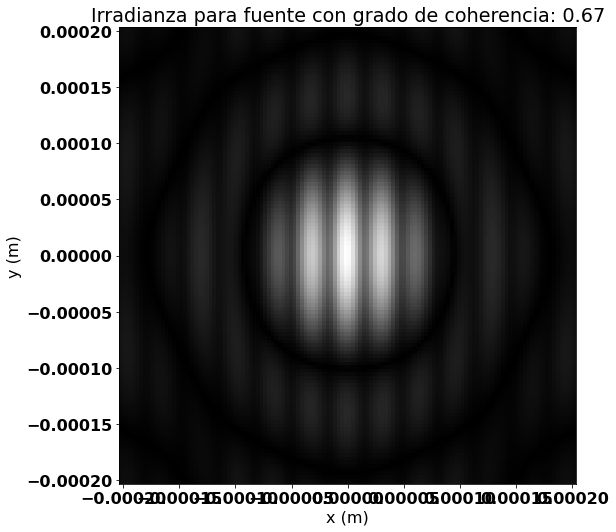

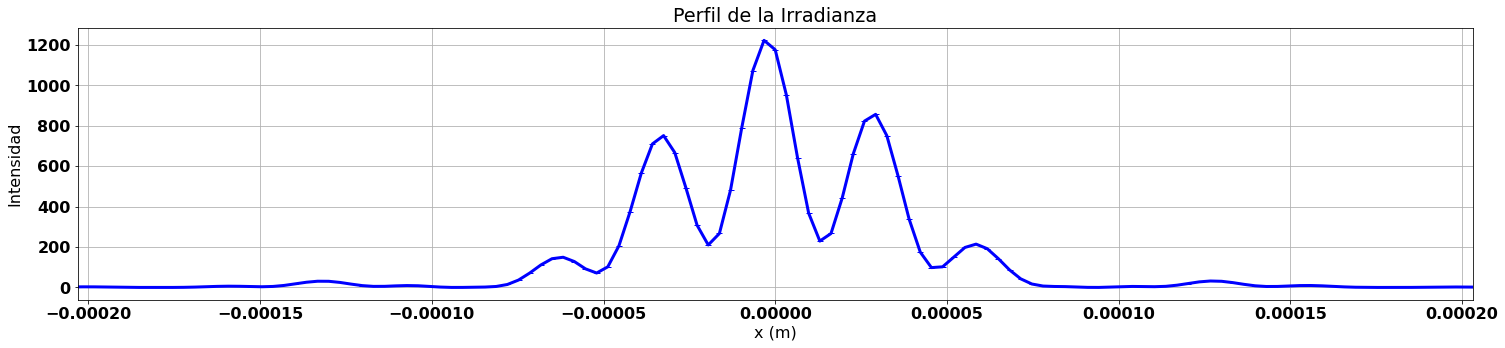

In [ ]:
lam0=650*1e-9
c=3e8
k0=2*np.pi/lam0
nu0=c/lam0

####### Densidad espectral 
M=51
delnu=2e9
b=delnu/(2*np.sqrt(np.log(2)))
dnu=4*delnu/M

########## Parametros espacio físico
L=50e-3
N=250
dx=L/N
x=np.arange(-L/2,L/2,dx)
x=np.fft.fftshift(x)
X, Y = np.meshgrid(x, x);

########## Parámetros del haz
w=1e-3
dels=5e-3
deld=5e-2
f=0.25
lf=lam0*f

######## Sumatoria de irradianzas
I2=np.zeros([N,N])
for n in range(0,M):
  nu=(n-(M+1)/2)*dnu+nu0
  S=1/(np.sqrt(np.pi)*b)*np.exp(-((nu-nu0)**2)/b**2)
  k=2*np.pi*nu/c
  u=circ(X-dels/2,Y,w)+circ(X+dels/2,Y,w)*np.exp(1j*k*deld)
  u2=(1/lf)*np.fft.fft2(u)*dx**2
  I2=I2+S*(np.abs(u2)**2)*dnu


I2=np.fft.ifftshift(I2)
x2=np.arange(-1/(2*dx),1/(2*dx),1/L)*lf
L2=(lf/(dx))


# GRAFICACIÓN INTENSIDADES

# Parametros de la figura
font = {'weight' : 'bold', 'size'   : 16}
matplotlib.rc('font', **font)
fig = plt.figure(figsize=(18,10))
fig.subplots_adjust(hspace=0.2)

plt.subplot(1,2,2)
plt.imshow(I2**(1/2), cmap='gray',extent=[-L2/2,L2/2,-L2/2,L2/2],origin='lower')
plt.title('Irradianza para fuente con grado de coherencia: 0.67')
plt.ylabel('y (m)')
plt.xlabel('x (m)')
m=5 ## valor máximo m=10 para el zoom
plt.xlim(-m*0.1*L2/2,m*0.1*L2/2) ## zoom para ver mejor la imagen
plt.ylim(-m*0.1*L2/2,m*0.1*L2/2) ## zoom para ver mejor la imagen: NOTE QUE LOS VALORES ESTÁN INVERTIDOS

# Parametros de la figura
font = {'weight' : 'bold', 'size'   : 16}
matplotlib.rc('font', **font)
fig1 = plt.figure(figsize=(25,5))
fig1.subplots_adjust(hspace=0.2)

plt.plot(x2,I2[round(N/2),:],lw=3,marker='_',label = 'Sistema DL',color='blue')
plt.title('Perfil de la Irradianza')
plt.ylabel('Intensidad')
plt.xlabel('x (m)')
plt.grid()
mm=10 ## valor máximo m=10 para el zoom
plt.xlim(-m*0.1*L2/2,m*0.1*L2/2) ## zoom para ver mejor la imagen

print('El tiempo de coherencia es : %.3f s' % (deld/(c)))
print('la longitud de coherencia es : %.5f m' % (2*deld))

#**Coherencia espacial**

(-0.00040625, 0.00040625)

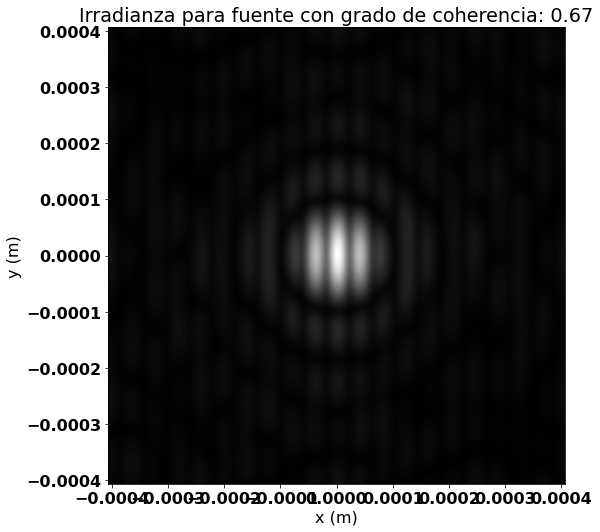

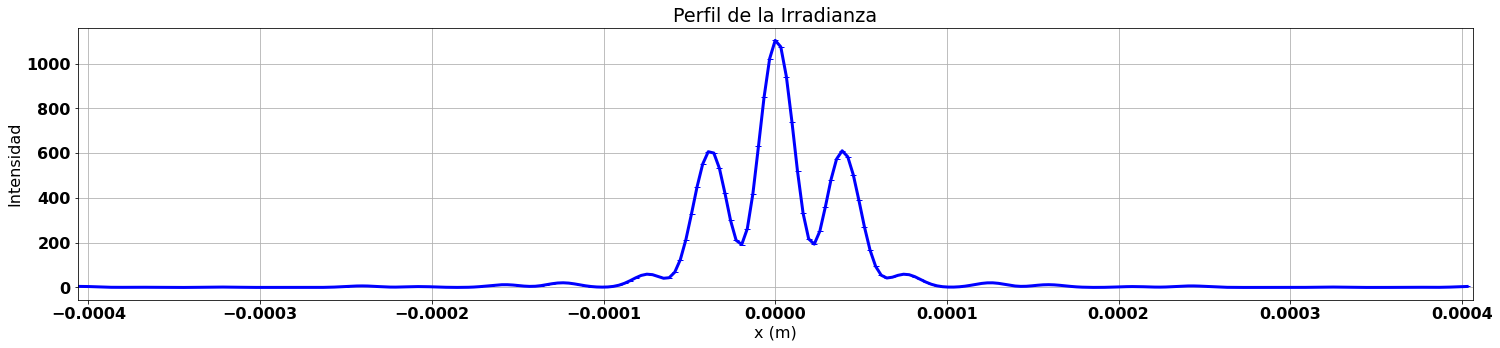

In [ ]:
lam=650*1e-9

########## Parametros espacio físico
L=50e-3
N=250
dx=L/N
x=np.arange(-L/2,L/2,dx)
x=np.fft.fftshift(x)
X, Y = np.meshgrid(x, x);

########## Parámetros del haz
w=1e-3
dels=4e-3
f=0.25
lf=lam*f

######## Parámetros de las panatlas de fase
M=100
Lcr=8e-3
sigma_f=2.5*Lcr
sigma_r=np.sqrt((4*np.pi*sigma_f**4)/Lcr**2)

dfx=1/L
fx=np.arange(-1/(2*dx),1/(2*dx),dfx)
fx=np.fft.fftshift(fx)
FX, FY=np.meshgrid(fx,fx);

####### Plano fuente
u=circ(X-dels/2,Y,w)+circ(X+dels/2,Y,w)
F=np.exp(-(np.pi**2)*(sigma_f**2)*(FX**2+FY**2))

######## Sumatoria de irradianzas
I2=np.zeros([N,N])
for i in range(0,50):
  fie=(np.fft.ifft2(F*(np.random.uniform(-3,3,(N,N))+1j*np.random.uniform(-3,3,(N,N))))*sigma_r/dfx)*N**2*dfx**2
  u2=(1/lf)*np.fft.fft2(u*np.exp(1j*np.real(fie)))*dx**2
  I2=I2+(np.abs(u2)**2)
  u2=(1/lf)*np.fft.fft2(u*np.exp(1j*np.imag(fie)))*dx**2
  I2=I2+(np.abs(u2)**2)


I2=np.fft.ifftshift(I2)/M
x2=np.arange(-1/(2*dx),1/(2*dx),1/L)*lf
L2=(lf/(dx))

# GRAFICACIÓN INTENSIDADES

# Parametros de la figura
font = {'weight' : 'bold', 'size'   : 16}
matplotlib.rc('font', **font)
fig = plt.figure(figsize=(18,10))
fig.subplots_adjust(hspace=0.2)

plt.subplot(1,2,2)
plt.imshow(I2**(1/2), cmap='gray',extent=[-L2/2,L2/2,-L2/2,L2/2],origin='lower')
plt.title('Irradianza para fuente con grado de coherencia: 0.67')
plt.ylabel('y (m)')
plt.xlabel('x (m)')
m=10 ## valor máximo m=10 para el zoom
plt.xlim(-m*0.1*L2/2,m*0.1*L2/2) ## zoom para ver mejor la imagen
plt.ylim(-m*0.1*L2/2,m*0.1*L2/2) ## zoom para ver mejor la imagen: NOTE QUE LOS VALORES ESTÁN INVERTIDOS

# Parametros de la figura
font = {'weight' : 'bold', 'size'   : 16}
matplotlib.rc('font', **font)
fig1 = plt.figure(figsize=(25,5))
fig1.subplots_adjust(hspace=0.2)

plt.plot(x2,I2[round(N/2),:],lw=3,marker='_',label = 'Sistema DL',color='blue')
plt.title('Perfil de la Irradianza')
plt.ylabel('Intensidad')
plt.xlabel('x (m)')
plt.grid()
mm=10 ## valor máximo m=10 para el zoom
plt.xlim(-m*0.1*L2/2,m*0.1*L2/2) ## zoom para ver mejor la imagen
